# importing the requries libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ubale\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\ubale\Downloads\UniversalBank.csv")
df

# reading the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.head()

# it shows the top rows of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.isnull().sum()

# chaking the missing values in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df1 = df.drop(["ID","ZIP Code"], axis=1)
df1.head()

# here we are dropping the two columns of the dataset
# axis=1 means all the rows from the dataset

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<AxesSubplot:title={'center':'Heatmap showing Correlation between all features'}>

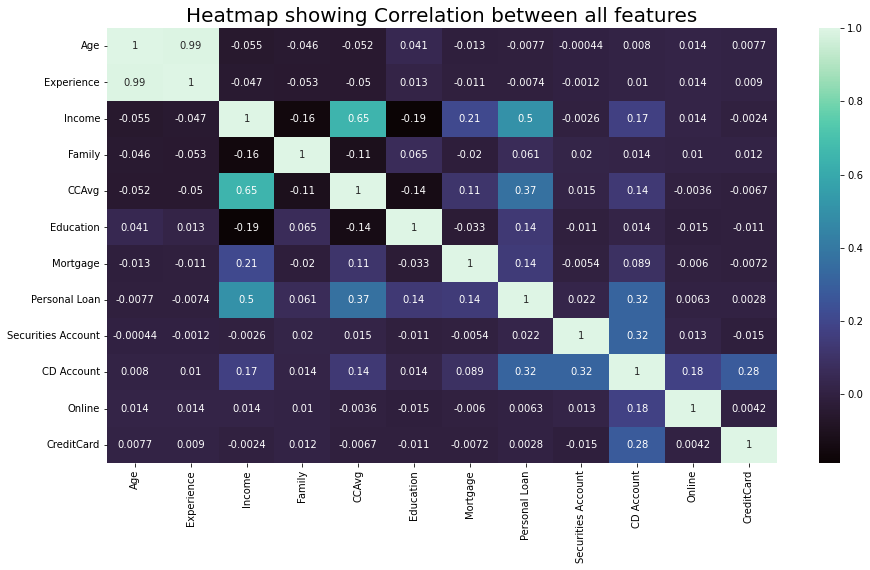

In [6]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all features",fontsize=20)
sns.heatmap(df1.corr(),annot = True, cmap='mako')

# plotting the heatmap for showing the correlation

In [7]:
zero_class = df1[df1.CreditCard==0]
zero_class.shape

# here we are crating the class 0 and showing the shape of the calss

(3530, 12)

In [8]:
one_class = df1[df1.CreditCard==1]
one_class.shape

# here we are crating the class 1 and showing the how many columns and rows are present in the class

(1470, 12)

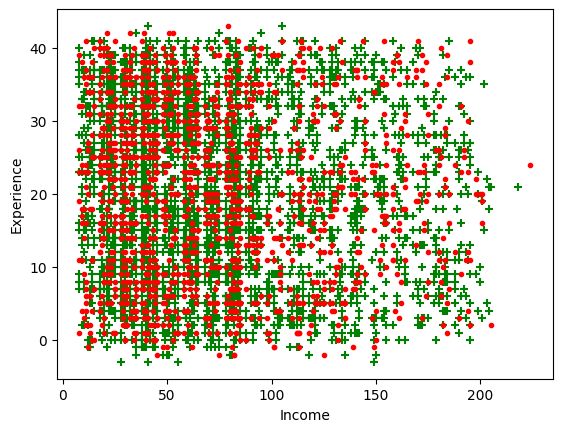

In [ ]:
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Income'],one_class['Experience'], color = 'red', marker='.')

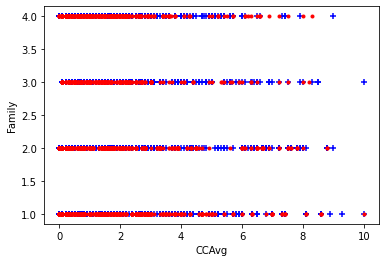

In [9]:
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'], color = 'blue', marker='+')
plt.scatter(one_class['CCAvg'],one_class['Family'], color = 'red', marker='.')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

# dropping the target column and bringing the values in the range


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [11]:
x = df_scaled
y = df1['CreditCard']

# splitting the columns in target variable and input variable

In [12]:
# splitting the data into the train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

# here we are importing the svc model and checking the accuracy score and printing it

Model accuracy : 0.749


<AxesSubplot:>

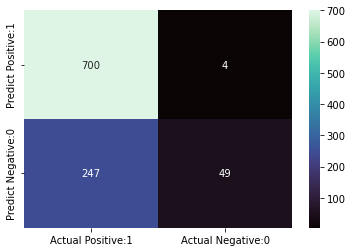

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                         index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# importing the confusion matrix to check the accuracy and showing the matrix into the heatmap

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [16]:
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

# applying the svm model using  the kernal function

Model accuracy with rbf kernel : 0.747


<Axes: >

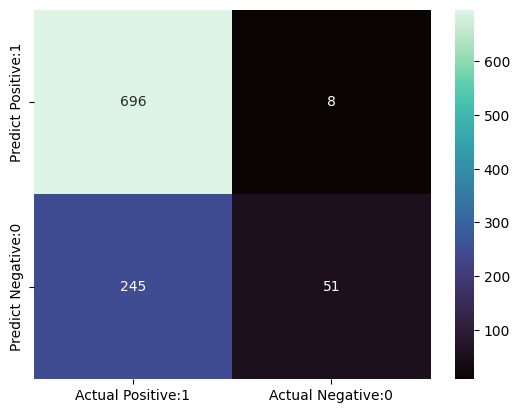

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# confusion matix


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



In [18]:
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.629


<AxesSubplot:>

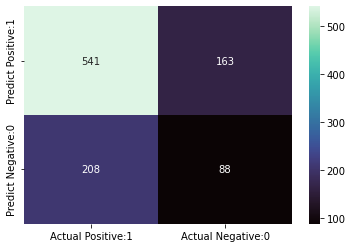

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       704
           1       0.35      0.30      0.32       296

    accuracy                           0.63      1000
   macro avg       0.54      0.53      0.53      1000
weighted avg       0.61      0.63      0.62      1000

